In [1]:
from iapws import IAPWS97

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
steam = IAPWS97(P=2, T=573)
print(steam.s)

6.767907995965336


In [5]:
print("specific volume:", steam.v , "m^3/kg")
print("specific enthalpy:", steam.h , "kJ/kg")
print("specific entropy", steam.s , "kJ/kgK")

specific volume: 0.12546083662220325 m^3/kg
specific enthalpy: 3023.9038290179424 kJ/kg
specific entropy 6.767907995965336 kJ/kgK


In [6]:
dokimi = IAPWS97(P=5 , T = 300)
print("Phase", dokimi.phase)

Phase Liquid


In [7]:
test_saturated_vapour = IAPWS97(P=10, x=1)
print(test_saturated_vapour.T)




584.1494879985282


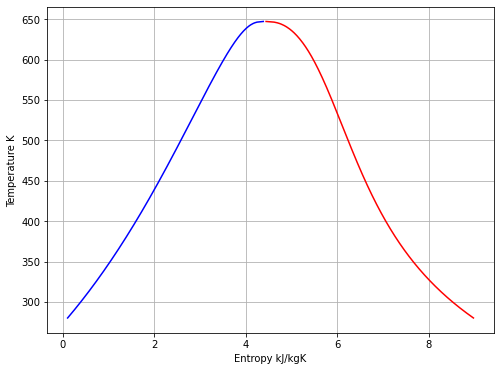

In [15]:



P_range = np.logspace(-3, 1.3436, 1000)  


T_liquid = [IAPWS97(P=P, x=0).T for P in P_range]
T_vapor = [IAPWS97(P=P, x=1).T for P in P_range]
s_liquid = [IAPWS97(P=P, x=0).s for P in P_range]
s_vapor = [IAPWS97(P=P, x=1).s for P in P_range]

plt.figure(figsize=(8,6))
plt.plot(s_liquid, T_liquid, color='b', label="Liquid saturation line")
plt.plot(s_vapor, T_vapor, color='r', label="Vapor saturation line")
plt.xlabel('Entropy kJ/kgK')
plt.ylabel('Temperature K')
plt.grid(True)
plt.show()



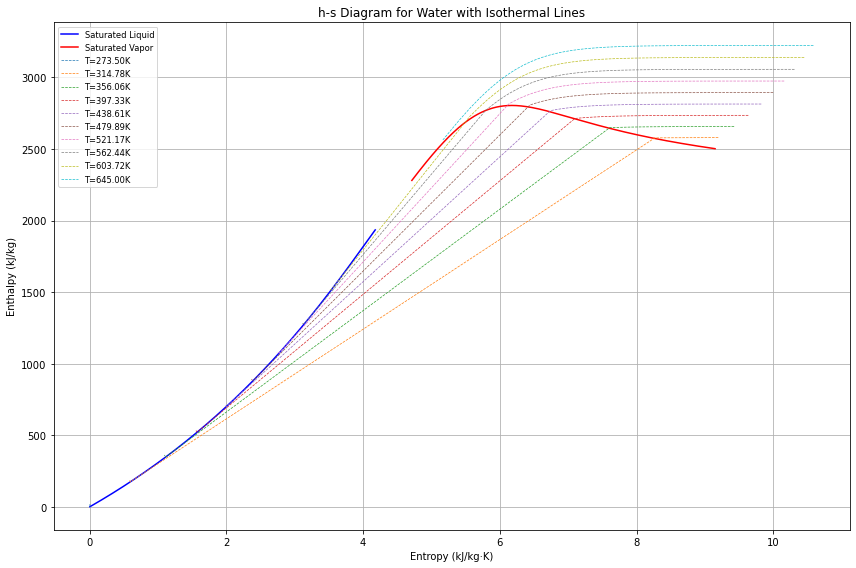

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from iapws import IAPWS97

def saturation_properties_vs_temperature(T_range):
    h_liquid = []
    h_vapor = []
    s_liquid = []
    s_vapor = []

    for T in T_range:
        sat_liquid = IAPWS97(T=T, x=0)
        sat_vapor = IAPWS97(T=T, x=1)

        h_liquid.append(sat_liquid.h)
        h_vapor.append(sat_vapor.h)
        s_liquid.append(sat_liquid.s)
        s_vapor.append(sat_vapor.s)

    return h_liquid, h_vapor, s_liquid, s_vapor

def isothermal_properties(T, P_range):
    h_values = []
    s_values = []

    for P in P_range:
        try:
            steam = IAPWS97(T=T, P=P)
            h_values.append(steam.h)
            s_values.append(steam.s)
        except NotImplementedError:
            pass

    return h_values, s_values

def plot_hs_diagram(T_range, P_range):
    h_liquid, h_vapor, s_liquid, s_vapor = saturation_properties_vs_temperature(T_range)

    plt.figure(figsize=(12, 8))
    plt.plot(s_liquid, h_liquid, label='Saturated Liquid', color='blue')
    plt.plot(s_vapor, h_vapor, label='Saturated Vapor', color='red')

    # Plotting isothermal lines
    T_iso = np.linspace(min(T_range), max(T_range), 10)
    for T in T_iso:
        h_iso, s_iso = isothermal_properties(T, P_range)
        plt.plot(s_iso, h_iso, '--', linewidth=0.7, label=f'T={T:.2f}K')

    plt.title('h-s Diagram for Water with Isothermal Lines')
    plt.xlabel('Entropy (kJ/kg·K)')
    plt.ylabel('Enthalpy (kJ/kg)')
    plt.legend(loc='upper left', fontsize='small')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    T_range = np.linspace(273.5, 645, 500)
    P_range = np.logspace(-3, 1.3, 100)
    plot_hs_diagram(T_range, P_range)


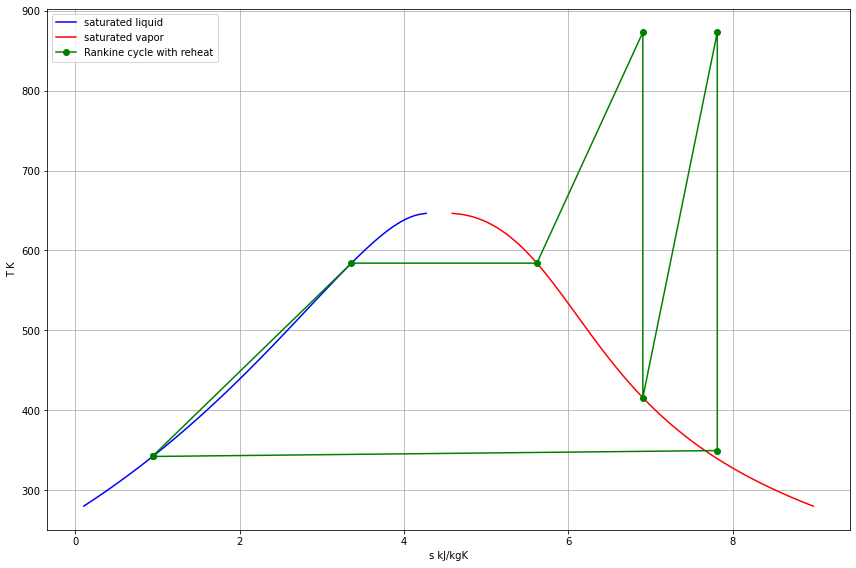

In [44]:
# Rankine Cycle
# Boiler exit temp @ 873K and 10 MPa
# reheat to 1.6 MPa and 873K
# condenser pressure 30kPa
# assume ideal cycle

#saturation lines 
P_range = np.logspace(-3, np.log10(21.912), 500)
T_liquid = [IAPWS97(P=P, x=0).T for P in P_range]
T_vapor = [IAPWS97(P=P, x=1).T for P in P_range]
s_liquid = [IAPWS97(P=P, x=0).s for P in P_range]
s_vapor = [IAPWS97(P=P, x=1).s for P in P_range]

#define the states
state_1 = IAPWS97(P=0.03, x=0)
state_2 = IAPWS97(P=10, s=state_1.s)
state_2a = IAPWS97(P=state_2.P, x=0)
state_2b = IAPWS97(P=10, x=1)
state_3 = IAPWS97(P=10, T=873)

target_entropy=state_3.s
P_estimate=1
while P_estimate > 0.03:
    test_state = IAPWS97(P=P_estimate, s=target_entropy)
    if test_state.x <1:
        P_estimate += 0.01
        break

    P_estimate -= 0.01

state_4 = IAPWS97(P=P_estimate, s=target_entropy)
state_5 = IAPWS97(P=1.6, T=873)
state_6 = IAPWS97(P=0.03, s=state_5.s)
state_7 = IAPWS97(P=0.03, x=0)

plt.figure(figsize=(12,8))
plt.plot(s_liquid,T_liquid, color='b', label='saturated liquid')
plt.plot(s_vapor,T_vapor, color='r', label='saturated vapor')
plt.plot([state_1.s, state_2.s, state_2a.s, state_2b.s, state_3.s, state_4.s, state_5.s, state_6.s, state_7.s],
         [state_1.T, state_2.T, state_2a.T, state_2b.T, state_3.T, state_4.T, state_5.T, state_6.T, state_7.T], 'g-o', label="Rankine cycle with reheat")
plt.xlabel('s kJ/kgK')
plt.ylabel('T K')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()